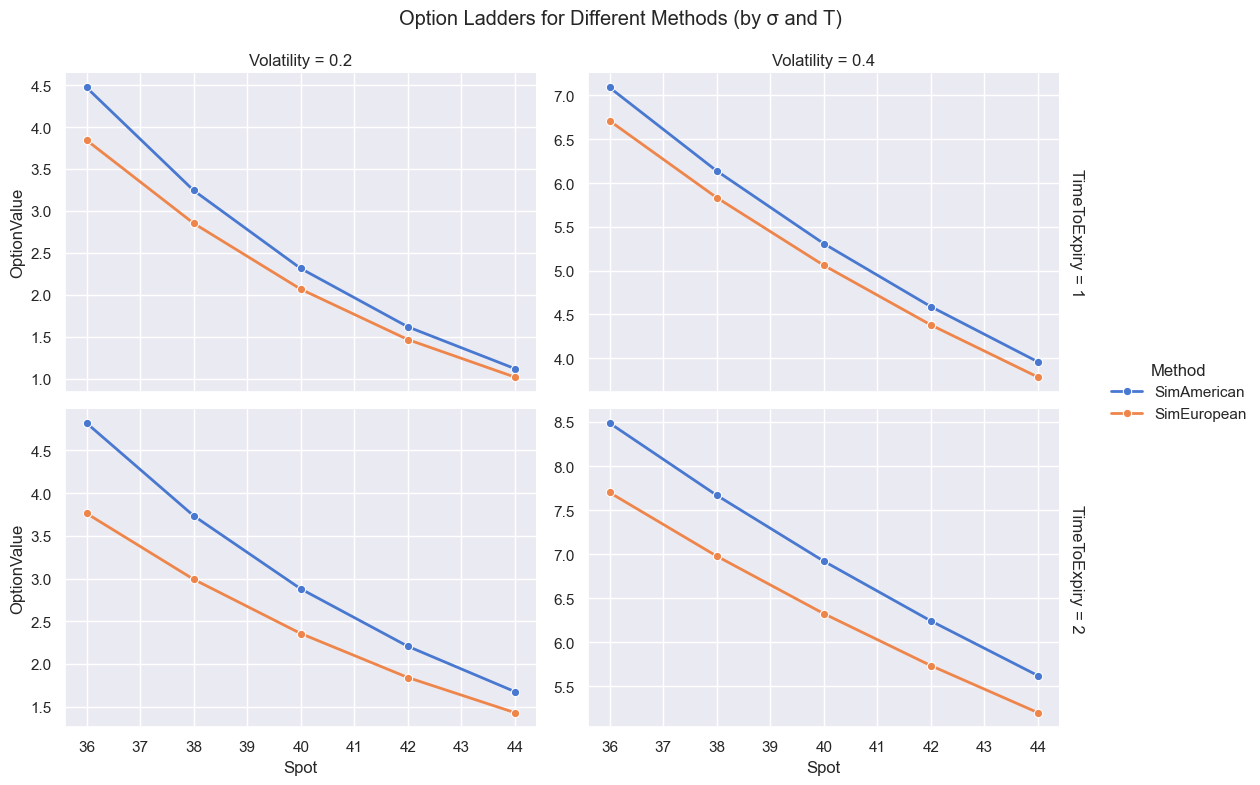

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("data.csv")

# Melt the dataframe to long format for easier plotting
df_long = df.melt(
    id_vars=["Spot", "Volatility", "TimeToExpiry"],
    value_vars=[
        "SimAmerican",
        "SimEuropean",
    ],
    var_name="Method",
    value_name="OptionValue",
)

# Plot using seaborn
sns.set(style="darkgrid", palette="muted")

g = sns.FacetGrid(
    df_long,
    col="Volatility",
    row="TimeToExpiry",
    hue="Method",
    margin_titles=True,
    sharey=False,
    height=4,
    aspect=1.41,
)

g.map(sns.lineplot, "Spot", "OptionValue", marker="o", linewidth=2)
g.add_legend()

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Option Ladders for Different Methods (by σ and T)")
plt.show()